In [2]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)


(1151, 19)

In [3]:
tuned_parameters =  [{'n_neighbors': [1, 2,3,4,5,6,7,8,9,10,25,50,75,100]}]
shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)
clfKNN = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=shuffle_split,scoring='f1_micro', return_train_score=True)
clfKNN.fit(X_train_scaledMinMax, Y_train)
print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)
print()
print("mean training:")
print()
print(clfKNN.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clfKNN.cv_results_['mean_test_score'])
print("Final real Test set f1_micro score: {:.2f}".format(clfKNN.score(X_test_scaledMinMax, Y_test)))
# plot using the accuracy
 

Best parameters set found on development set:

{'n_neighbors': 25}

mean training:

[ 1.          0.78804348  0.80248447  0.7515528   0.75139752  0.72096273
  0.72593168  0.70108696  0.70512422  0.68742236  0.675       0.64534161
  0.64658385  0.62298137]
mean test:

[ 0.58322981  0.58198758  0.61180124  0.6         0.62546584  0.61118012
  0.62919255  0.62484472  0.63416149  0.62857143  0.6447205   0.63664596
  0.63540373  0.61242236]
Final real Test set f1_micro score: 0.66


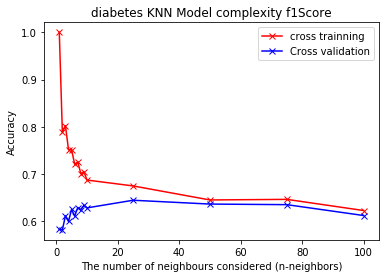

In [4]:
b=tuned_parameters[0]['n_neighbors']
plt.plot(b,clfKNN.cv_results_['mean_train_score'],'x-',color="r")
plt.plot(b,clfKNN.cv_results_['mean_test_score'],'x-',color="b")
plt.legend(['cross trainning ','Cross validation'])
plt.xlabel('The number of neighbours considered (n-neighbors)')
plt.ylabel('Accuracy')
plt.title('diabetes KNN Model complexity f1Score')
plt.show()

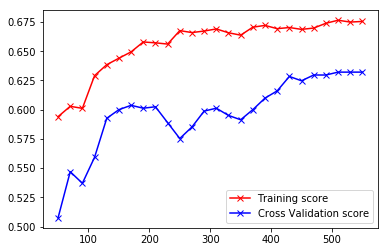

In [10]:
sample_size=np.arange(50,560,20)
shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
from sklearn.model_selection import learning_curve
samples, sample_train, sample_valid=learning_curve(KNeighborsClassifier(n_neighbors=25), X_train_scaledMinMax, Y_train,  train_sizes=sample_size, cv=shuffle_split2)
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")

Text(0.5,1,' learning curve for diabetes KNN model')

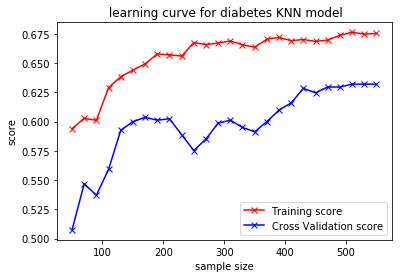

In [11]:
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")
plt.xlabel('sample size')
plt.ylabel('score')
plt.title(' learning curve for diabetes KNN model' )

In [7]:
pd.DataFrame(clfKNN.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001502,0.004283,0.583230,1.000000,1,{'n_neighbors': 1},13,0.639752,1.000000,0.596273,...,0.571429,1.000000,0.552795,1.000000,0.565217,1.000000,0.001132,0.002283,0.035621,0.000000
1,0.000790,0.003017,0.581988,0.788043,2,{'n_neighbors': 2},14,0.559006,0.782609,0.559006,...,0.614907,0.793478,0.590062,0.795031,0.583851,0.787267,0.000241,0.000646,0.031677,0.007090
2,0.000829,0.003096,0.611801,0.802484,3,{'n_neighbors': 3},10,0.614907,0.818323,0.608696,...,0.633540,0.791925,0.583851,0.809006,0.552795,0.807453,0.000198,0.000531,0.031823,0.017606
3,0.000798,0.003330,0.600000,0.751553,4,{'n_neighbors': 4},12,0.577640,0.740683,0.627329,...,0.590062,0.746894,0.596273,0.759317,0.577640,0.756211,0.000242,0.000580,0.033007,0.012088
4,0.000989,0.003612,0.625466,0.751398,5,{'n_neighbors': 5},7,0.627329,0.754658,0.670807,...,0.645963,0.751553,0.577640,0.746894,0.571429,0.756211,0.000384,0.000570,0.039386,0.006344
5,0.000694,0.003155,0.611180,0.720963,6,{'n_neighbors': 6},11,0.602484,0.723602,0.627329,...,0.596273,0.725155,0.596273,0.712733,0.590062,0.711180,0.000082,0.000431,0.037080,0.006553
6,0.000688,0.003242,0.629193,0.725932,7,{'n_neighbors': 7},5,0.614907,0.720497,0.633540,...,0.645963,0.737578,0.633540,0.723602,0.571429,0.731366,0.000060,0.000329,0.043483,0.012734
7,0.000690,0.003085,0.624845,0.701087,8,{'n_neighbors': 8},8,0.627329,0.711180,0.639752,...,0.627329,0.700311,0.602484,0.694099,0.590062,0.712733,0.000061,0.000307,0.032178,0.007678
8,0.000740,0.003283,0.634161,0.705124,9,{'n_neighbors': 9},4,0.633540,0.703416,0.664596,...,0.645963,0.704969,0.645963,0.694099,0.621118,0.720497,0.000092,0.000415,0.031726,0.008489
9,0.000736,0.003355,0.628571,0.687422,10,{'n_neighbors': 10},6,0.627329,0.692547,0.645963,...,0.639752,0.686335,0.608696,0.677019,0.590062,0.690994,0.000170,0.000278,0.025579,0.006174
